In [277]:
import pandas as pd

In [335]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

folder_path = '09November-analysed/'
file_pattern = 'ResultsGPT_*.xlsx'
data = pd.DataFrame()

# List and read all matching Excel files
for file in os.listdir(folder_path):
    if file.startswith('ResultsGPT_') and file.endswith('.xlsx'):
        print(file)
        file_path = os.path.join(folder_path, file)
        new_data = pd.read_excel(file_path)

        # Drop duplicates based on 'groundtruth.sentence' and 'ocr.sentence'
        new_data_unique = new_data.drop_duplicates()

        data = pd.concat([data, new_data_unique], ignore_index=True)


data = data.fillna(" ")

def replace_empty(x):
    
    if 'empty' in str(x).lower():
        return "Empty answer"
    else:
        return x
    
data['Response Rate'] = data['Response Rate'].apply(lambda x: replace_empty(x))

ResultsGPT_htrec_Sample_09November.xlsx
ResultsGPT_impresso-nzz_Sample_09November.xlsx
ResultsGPT_overproof_Sample_09November.xlsx
ResultsGPT_ina_Sample_09November.xlsx
ResultsGPT_icdar-2019_Sample_09November.xlsx
ResultsGPT_icdar-2017_Sample_09November.xlsx
ResultsGPT_ajmc-primary-text_Sample_09November.xlsx
ResultsGPT_ajmc-mixed_Sample_09November.xlsx


Number of unique lines/sentences/regions.

Dataset: icdar-2019 404 with duplicates
No. lines: 0 / 404 No. sentences: 404 / 404 No. regions: 41 / 404
--------------------------------------------------------------------------------
Dataset: ajmc-primary 57 with duplicates
No. lines: 40 / 57 No. sentences: 27 / 57 No. regions: 9 / 57
--------------------------------------------------------------------------------
Dataset: overproof 2669 with duplicates
No. lines: 2278 / 2669 No. sentences: 399 / 2669 No. regions: 41 / 2669
--------------------------------------------------------------------------------
Dataset: ajmc-mixed 1291 with duplicates
No. lines: 535 / 1291 No. sentences: 379 / 1291 No. regions: 33 / 1291
--------------------------------------------------------------------------------
Dataset: impresso 1563 with duplicates
No. lines: 1256 / 1563 No. sentences: 577 / 1563 No. regions: 203 / 1563
--------------------------------------------------------------------------------
Dataset: icdar-2017 477 with duplicates
No. lines: 0 / 477 No. sentences: 461 / 477 No. regions: 28 / 477
--------------------------------------------------------------------------------
Dataset: htrec 180 with duplicates
No. lines: 180 / 180 No. sentences: 8 / 180 No. regions: 8 / 180
--------------------------------------------------------------------------------
Dataset: ina 489 with duplicates
No. lines: 201 / 489 No. sentences: 290 / 489 No. regions: 6 / 489

In [346]:
# Define models and prompts
models = data['model'].unique()
prompts = data['prompt'].unique()

models, prompts

(array(['BLOOMZ-7.1B', 'LLAMA-2-7B', 'GPT-4'], dtype=object),
 array(['prompt_complex_02', 'prompt_basic_02'], dtype=object))

In [347]:
# Group by 'dataset_name' and count unique 'groundtruth.sentence' entries
unique_sentence_counts = data.groupby('dataset_name')['groundtruth.sentence'].nunique()

TOTAL = {'ajmc-mixed': 379,
        'ajmc-primary-text': 27,
        'htrec': 8,
        'icdar-2017': 461,
        'icdar-2019': 404,
        'impresso-nzz': 577,
        'ina': 290,
        'overproof': 399}


# Display the unique counts for each dataset
print(unique_sentence_counts)
sample_counts

dataset_name
ajmc-mixed           41
ajmc-primary-text    14
htrec                 8
icdar-2017           85
icdar-2019           61
impresso-nzz         45
ina                  44
overproof            36
Name: groundtruth.sentence, dtype: int64


dataset_name
ajmc-mixed           271
ajmc-primary-text    123
htrec                282
icdar-2017           524
icdar-2019           397
impresso-nzz         289
ina                  279
overproof            294
dtype: int64

In [348]:
sample_counts = data.groupby('dataset_name').size()
sample_counts

dataset_name
ajmc-mixed           271
ajmc-primary-text    123
htrec                282
icdar-2017           524
icdar-2019           397
impresso-nzz         289
ina                  279
overproof            294
dtype: int64

In [357]:
sum(sample_counts)

2459

In [349]:
unique_sentence_counts = pd.concat([sample_counts, unique_sentence_counts], axis=1, join="inner")

unique_sentence_counts.columns = ['Total', 'Unique']

unique_sentence_counts

,Total,Unique
dataset_name,,
ajmc-mixed,271,41
ajmc-primary-text,123,14
htrec,282,8
icdar-2017,524,85
icdar-2019,397,61
impresso-nzz,289,45
ina,279,44
overproof,294,36


In [350]:
len(models) * len(prompts)

6

In [356]:
latex_table = "\\begin{table}[ht]\n\\centering\n\\begin{tabular}{|l|c|c|}\n\\hline\n"
latex_table += "Dataset Name & Unique Groundtruth Sentences & Dataset \% \\\\ \\hline\n"

for idx, x in unique_sentence_counts.iterrows():
    latex_table += f"{idx} & {x['Unique']} & {int((x['Unique'] * 100.0)/TOTAL[idx])}% \\\\ \n"

latex_table += "\\hline\n\\end{tabular}\n\\caption{Unique Groundtruth Sentences per Dataset}\n\\label{tab:unique_sentences_per_dataset}\n\\end{table}"

print(latex_table)


\begin{table}[ht]
\centering
\begin{tabular}{|l|c|c|}
\hline
Dataset Name & Unique Groundtruth Sentences & Dataset \% \\ \hline
ajmc-mixed & 41 & 10% \\ 
ajmc-primary-text & 14 & 51% \\ 
htrec & 8 & 100% \\ 
icdar-2017 & 85 & 18% \\ 
icdar-2019 & 61 & 15% \\ 
impresso-nzz & 45 & 7% \\ 
ina & 44 & 15% \\ 
overproof & 36 & 9% \\ 
\hline
\end{tabular}
\caption{Unique Groundtruth Sentences per Dataset}
\label{tab:unique_sentences_per_dataset}
\end{table}


In [ ]:
for data, dataset in zip(dataframes, datasets):

    # Analyzing the data per model and per prompt
    grouped_data = data.groupby(['model', 'prompt', 'dataset_name'])

    # Calculating metrics like Degradation Rate and Improvement Rate
    # Assuming 'Degradation Rate' and 'Improvement Rate' are columns in your dataset
    # Here we calculate the mean, but you can calculate other statistics as needed
    degradation_rate_mean = grouped_data['Degraded (y/n)'].mean()
    improvement_rate_mean = grouped_data['Improved (y/n)'].mean()

    # Display the results
    print("Degradation Rate per Model and Prompt:")
    print(degradation_rate_mean)
    print("\nImprovement Rate per Model and Prompt:")
    print(improvement_rate_mean)

    # Further statistical analysis can be done as needed


In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# for data, dataset in zip(dataframes, datasets):
#     print('--'*30)
#     print(dataset)
#     print('--'*30)
#     # Convert 'Degraded (y/n)' and 'Improved (y/n)' to Boolean if they are not already
#     data['Degraded (y/n)'] = data['Degraded (y/n)'].astype(bool)
#     data['Improved (y/n)'] = data['Improved (y/n)'].astype(bool)

#     # Bar Plot: Count of Degraded and Improved per Model
#     plt.figure(figsize=(10, 6))
#     degraded_count = data.groupby('model')['Degraded (y/n)'].sum()
#     improved_count = data.groupby('model')['Improved (y/n)'].sum()
#     count_df = pd.DataFrame({'Degraded': degraded_count, 'Improved': improved_count})
#     count_df.plot(kind='bar', ax=plt.gca())
#     plt.title('Count of Degraded and Improved Instances per Model')
#     plt.ylabel('Count')
#     plt.xlabel('Model')
#     plt.xticks(rotation=45)
#     plt.tight_layout()

#     # Stacked Bar Plot: Proportion of Degraded vs Improved per Model
#     plt.figure(figsize=(10, 6))
#     prop_df = count_df.div(count_df.sum(axis=1), axis=0)
#     prop_df.plot(kind='bar', stacked=True, ax=plt.gca())
#     plt.title('Proportion of Degraded vs Improved Instances per Model')
#     plt.ylabel('Proportion')
#     plt.xlabel('Model')
#     plt.xticks(rotation=45)
#     plt.tight_layout()

#     # Heatmap: Degradation and Improvement Across Models and Prompts
#     plt.figure(figsize=(10, 8))
#     pivot_table = pd.pivot_table(data, values=['Degraded (y/n)', 'Improved (y/n)'], index='model', columns='prompt', aggfunc='mean')
#     sns.heatmap(pivot_table, annot=True, cmap='coolwarm')
#     plt.title('Heatmap of Degradation and Improvement')
#     plt.ylabel('Model')
#     plt.xlabel('Prompt')
#     plt.xticks(rotation=45)
#     plt.tight_layout()

#     plt.show()


In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns


# for data, dataset in zip(dataframes, datasets):
#     # Prepare the data: Calculate mean 'overall-levenshtein-improvement-postprocessed' for each combination
#     grouped_data = data.groupby(['prompt', 'model', 'Degraded (y/n)', 'Improved (y/n)'])['overall-levenshtein-improvement-postprocessed'].mean().reset_index()

#     # Create a bar plot for each prompt
#     prompts = data['prompt'].unique()
#     for prompt in prompts:
#         plt.figure(figsize=(12, 6))
#         prompt_data = grouped_data[grouped_data['prompt'] == prompt]

#         sns.barplot(x='model', y='overall-levenshtein-improvement-postprocessed', hue='Degraded (y/n)', data=prompt_data)

#         plt.title(f'Overall Levenshtein Improvement Postprocessed for {prompt}')
#         plt.xlabel('Model')
#         plt.ylabel('Overall Levenshtein Improvement Postprocessed')
#         plt.xticks(rotation=45)
#         plt.legend(title='Degraded', loc='upper right')
#         plt.tight_layout()
#         plt.show()



In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Prepare the data: Calculate mean 'overall-levenshtein-improvement-postprocessed' for each category in the rates
# rate_columns = ['Degradation Rate', 'Response Rate', 'Hallucination Rate']
# for rate_column in rate_columns:
#     grouped_data = data.groupby(['prompt', 'model', rate_column])['overall-levenshtein-improvement-postprocessed'].mean().reset_index()

#     # Create a bar plot for each prompt
#     prompts = data['prompt'].unique()
#     for prompt in prompts:
#         plt.figure(figsize=(12, 6))
#         prompt_data = grouped_data[grouped_data['prompt'] == prompt]

#         sns.barplot(x='model', y='overall-levenshtein-improvement-postprocessed', hue=rate_column, data=prompt_data)

#         plt.title(f'Overall Levenshtein Improvement Postprocessed for {prompt} by {rate_column}')
#         plt.xlabel('Model')
#         plt.ylabel('Overall Levenshtein Improvement Postprocessed')
#         plt.xticks(rotation=45)
#         plt.legend(title=rate_column, loc='upper right')
#         plt.tight_layout()
#         plt.show()


In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Rate columns to be visualized
# rate_columns = ['Degradation Rate', 'Response Rate', 'Hallucination Rate']

# # Creating a bar plot for each rate column, combining all prompts
# for rate_column in rate_columns:
#     plt.figure(figsize=(15, 8))

#     # Grouping data by 'model', 'prompt', and the current rate column
#     grouped_data = data.groupby(['model', 'prompt', rate_column])['overall-levenshtein-improvement-postprocessed'].mean().reset_index()

#     # Creating a bar plot
#     sns.barplot(x='model', y='overall-levenshtein-improvement-postprocessed', hue='prompt', data=grouped_data, palette="deep")

#     plt.title(f'Overall Levenshtein Improvement Postprocessed by Model and {rate_column}')
#     plt.xlabel('Model')
#     plt.ylabel('Overall Levenshtein Improvement Postprocessed')
#     plt.xticks(rotation=45)
#     plt.legend(title='Prompt', loc='upper right')
#     plt.tight_layout()
#     plt.show()


In [282]:
CASES = [case for case in list(data['Degradation Rate'].unique()) + list(data['Improvement Rate'].unique()) if len(case) > 2]

CASES

['C3.5. Invention of a new text ',
 'C3.1 Paraphrasing ',
 'C3.2  Input text not corrected, and introduction of small modifications in the middle. ',
 'C3.4. Translation.',
 'C3.3 Input text is corrected, but has a medium-size continuation of the input text. ',
 'C2.2 Correct but partial answer.',
 'C2.1. Correct answer with minimal, harmless addition. ',
 'C2.3 Correct and improved layout and text readability.']

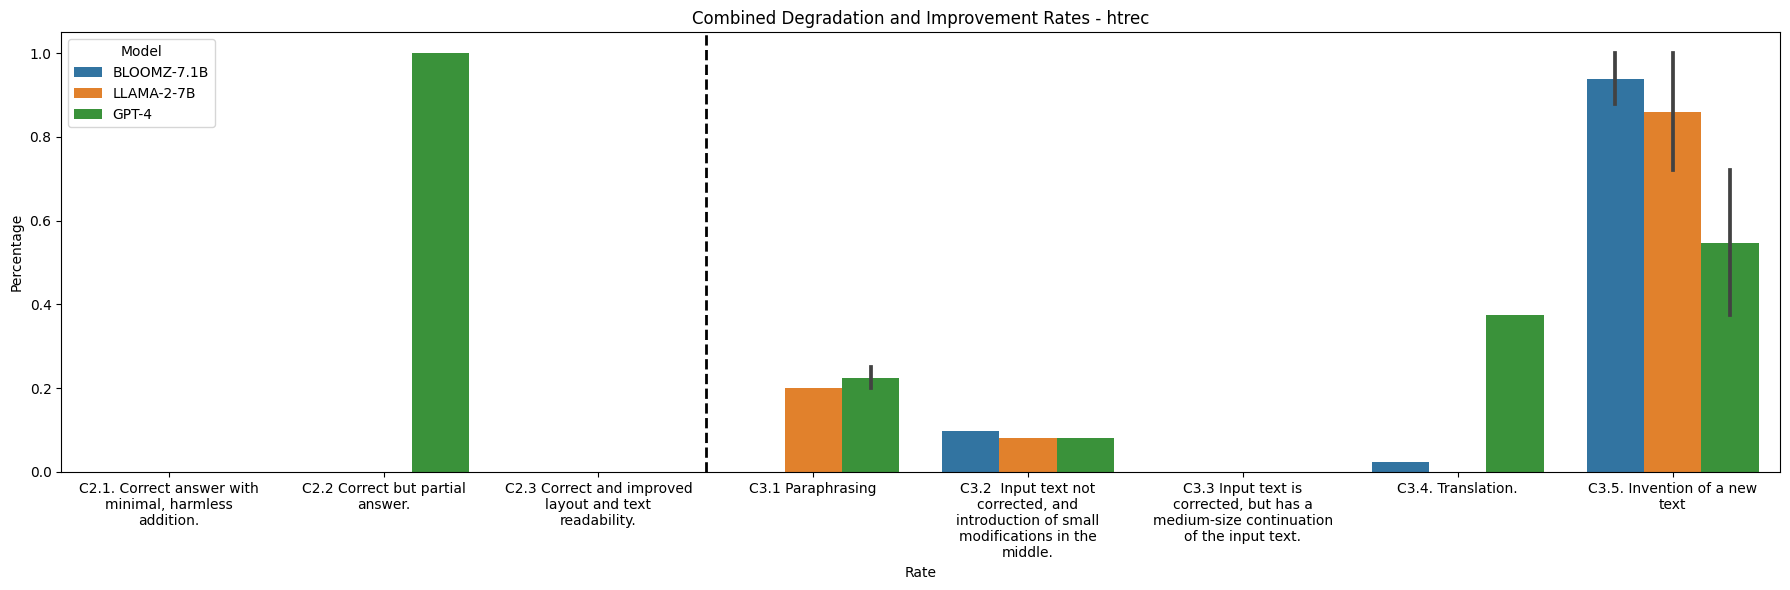

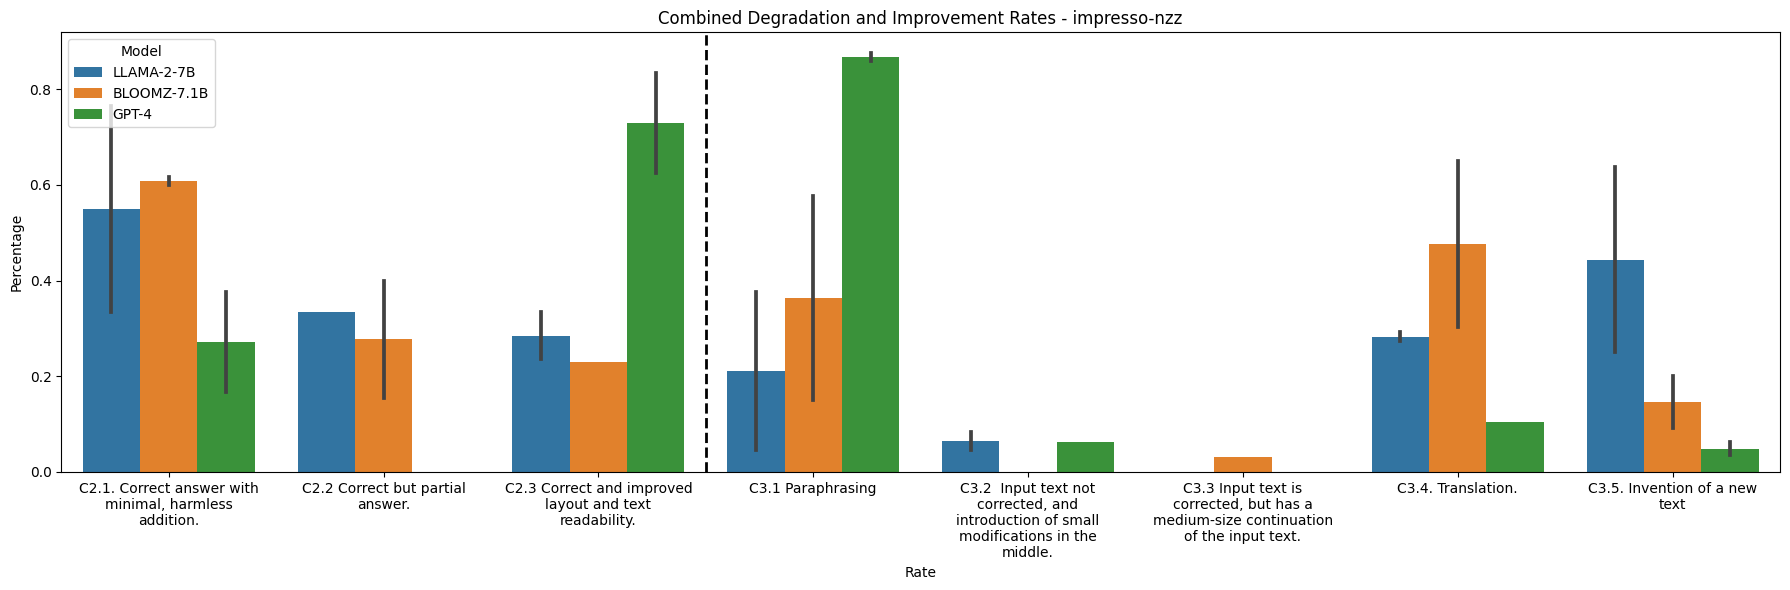

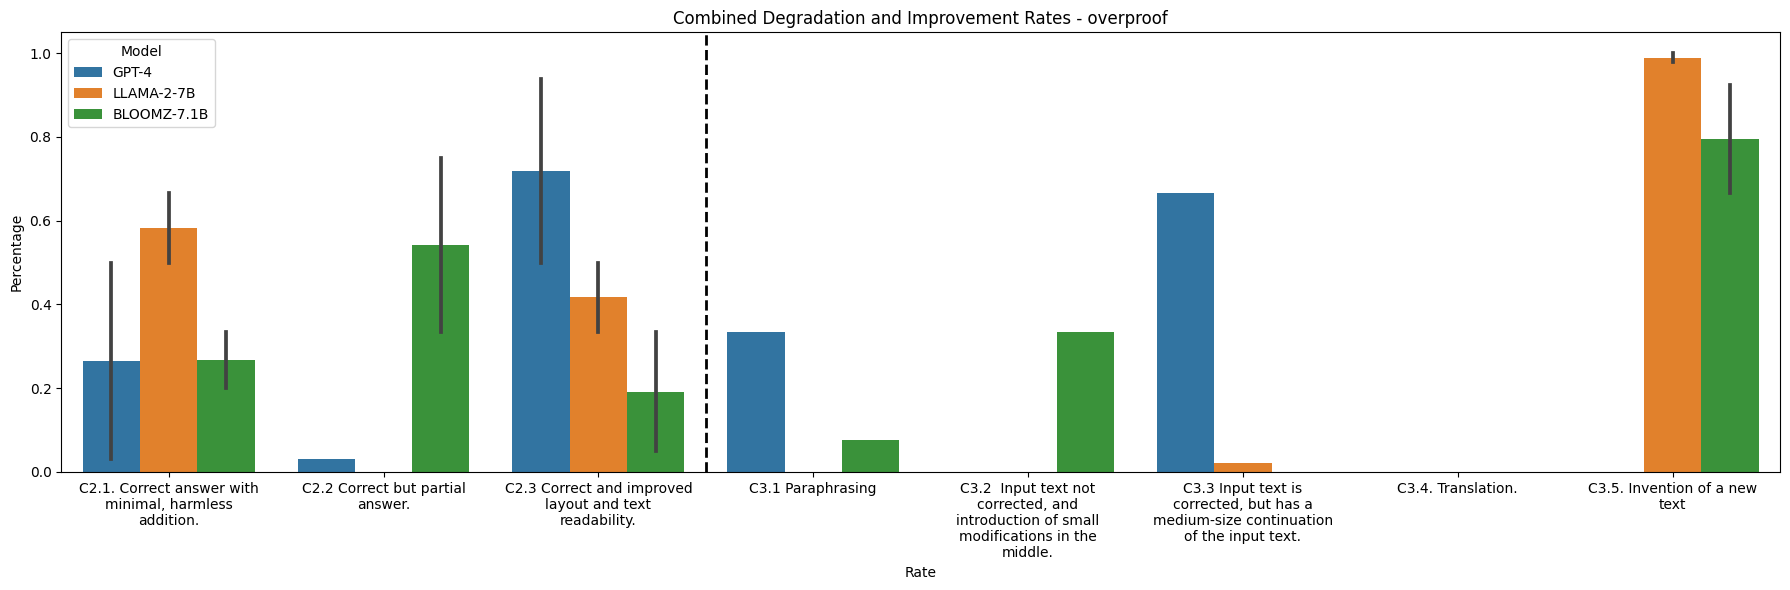

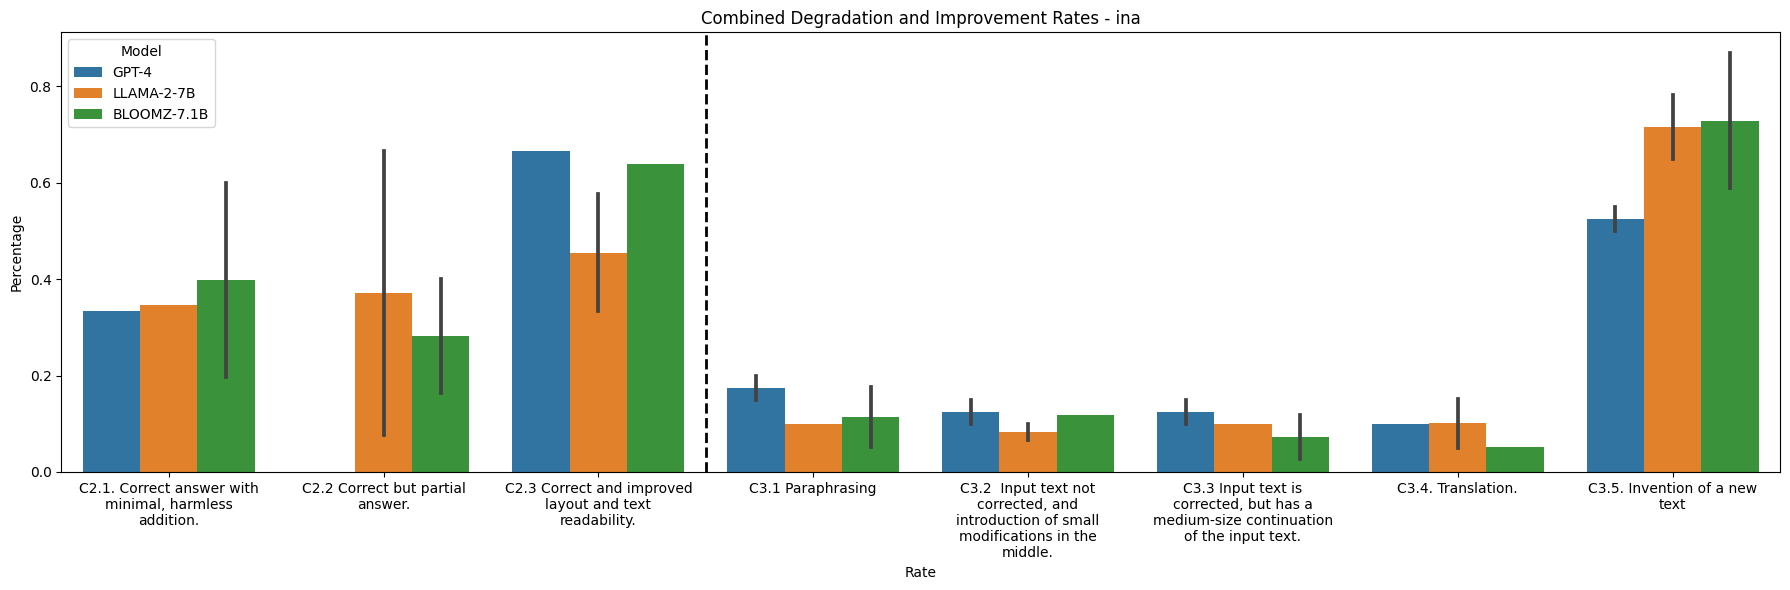

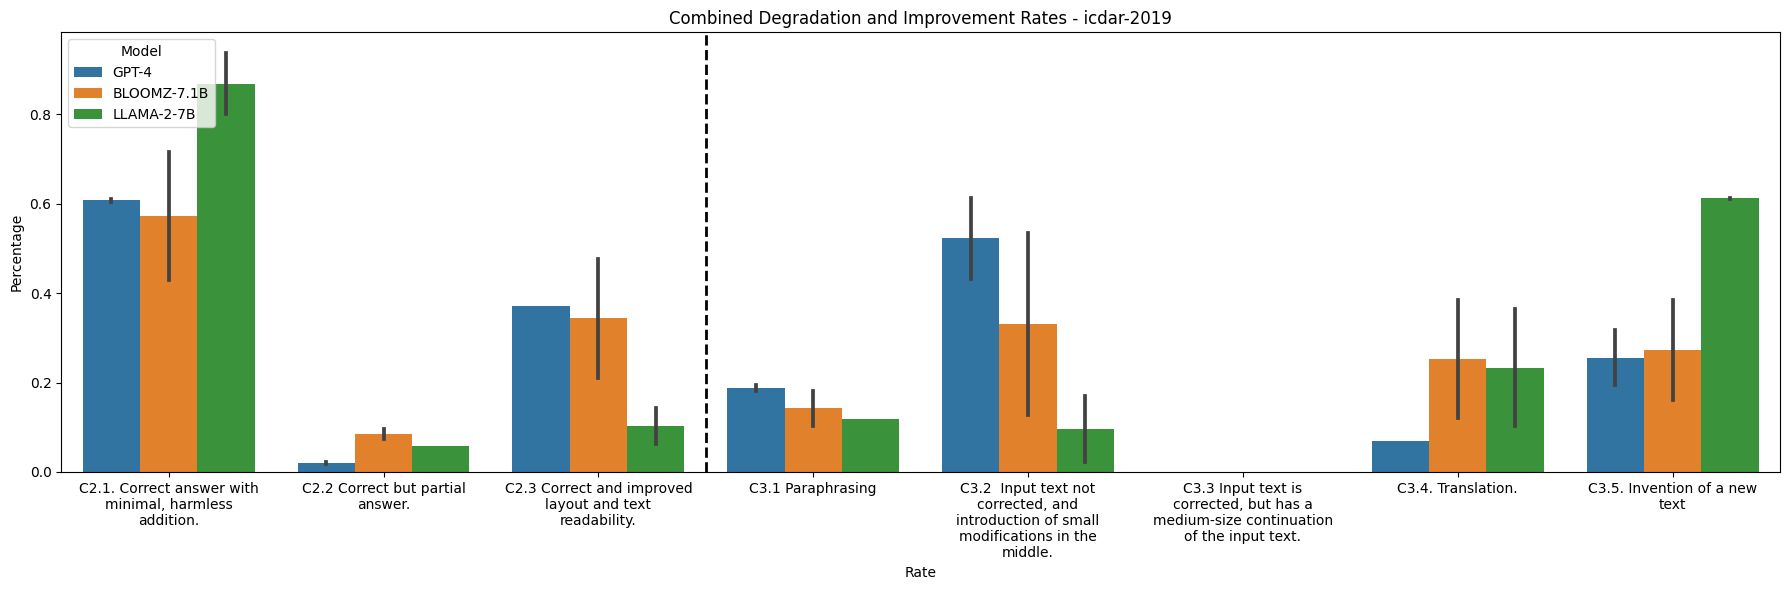

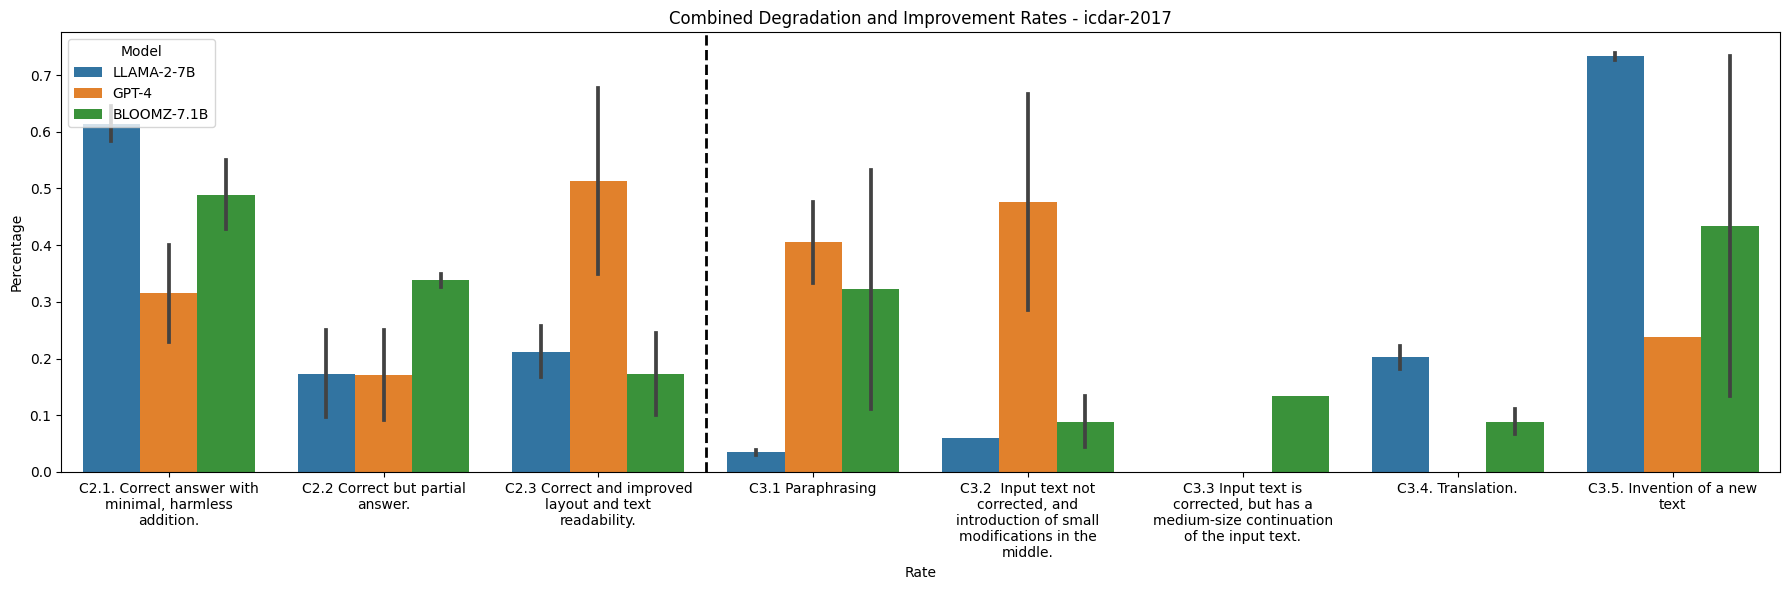

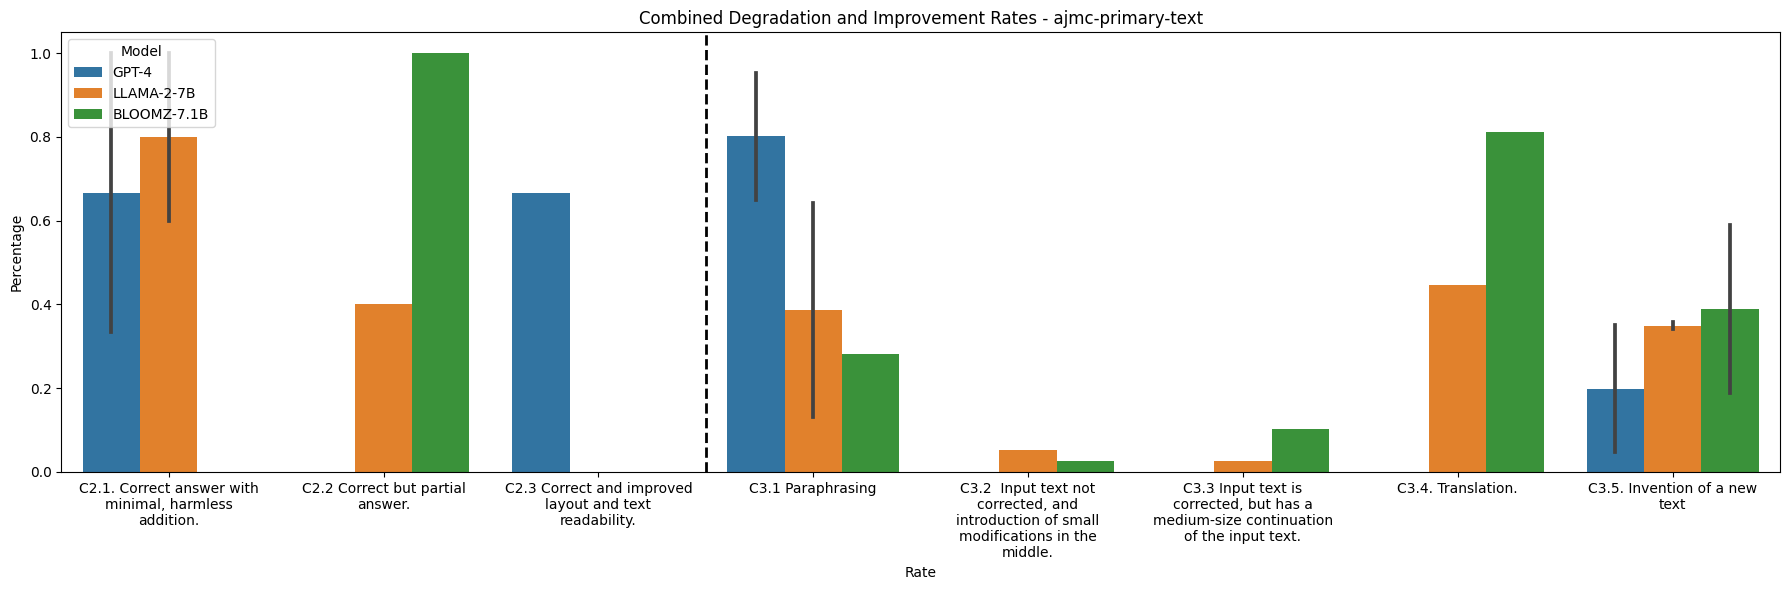

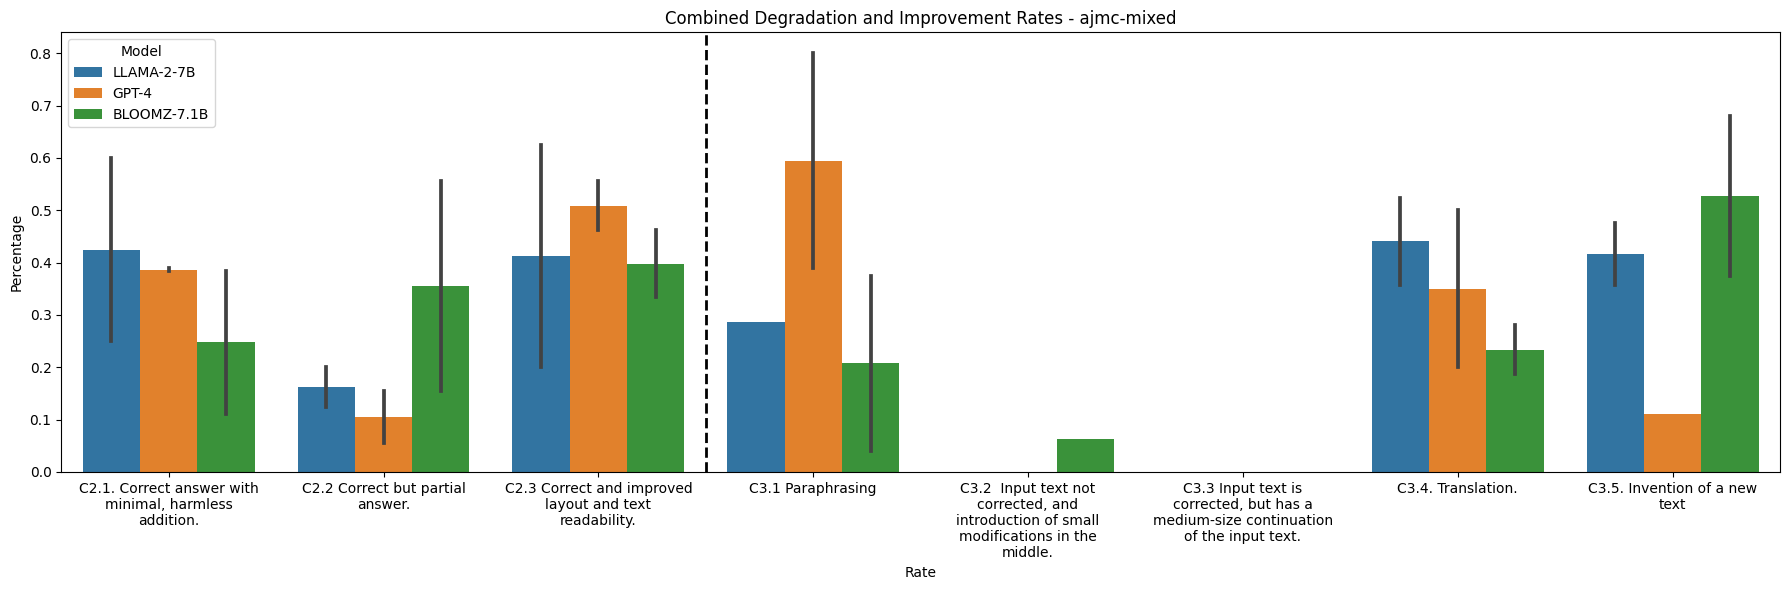

In [283]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap
sns.color_palette("colorblind", as_cmap=True)

def wrap_text(text, width=26):
    """Wrap text for better display in plots."""
    return "\n".join(textwrap.wrap(text, width=width))

CASES = [case for case in list(data['Degradation Rate'].unique()) + list(data['Improvement Rate'].unique()) if len(case) > 2]
CASES = [wrap_text(case) for case in CASES]

def plot_combined_rates(data, dataset_name, CASES):
    # Combine 'Degradation Rate', 'Improvement Rate', and 'Response Rate' into a single column
    improvement_data = data[['model', 'prompt', 'Improvement Rate']].rename(columns={'Improvement Rate': 'Rate'})
    improvement_data['Rate Type'] = 'Improvement'
    improvement_data = improvement_data[improvement_data['Rate'].str.len() > 2]
    degradation_data = data[['model', 'prompt', 'Degradation Rate']].rename(columns={'Degradation Rate': 'Rate'})
    degradation_data['Rate Type'] = 'Degradation'
    degradation_data = degradation_data[degradation_data['Rate'].str.len() > 2]
    combined_data = pd.concat([degradation_data, improvement_data])

    # Calculate the percentage for each category
    category_percentage = combined_data.groupby(['model', 'prompt', 'Rate Type', 'Rate']).size() / combined_data.groupby(['model', 'prompt', 'Rate Type']).size()
    category_percentage = category_percentage.reset_index(name='percentage')
    
    category_percentage = category_percentage.sort_values(by=['Rate Type'], ascending=[False])

    # Sorting by 'Rate Type' and then by 'Rate'
    category_percentage = category_percentage.sort_values(by=['Rate Type', 'Rate'])

    # Wrapping text for axis labels
    category_percentage['Rate'] = category_percentage['Rate'].apply(wrap_text)
    
    unique_cases = [wrap_text(case) for case in list(category_percentage['Rate'].unique())]
    untreated_cases = list(set(CASES) - set(unique_cases))
    
#     print('CASES', CASES)
#     print('category_percentage', category_percentage['Rate'].unique())
#     print('unique_cases', unique_cases)
#     print('untreated_cases', untreated_cases)

    # Create a DataFrame with all possible combinations
    all_combinations = pd.MultiIndex.from_product([data['model'].unique(), data['prompt'].unique(), 
                                                   ['Improvement', 'Degradation'], untreated_cases], names=['model', 'prompt', 'Rate Type', 'Rate']).to_frame(index=False)
    all_combinations['percentage'] = [0.0] * len(all_combinations)
    
    category_percentage = pd.concat([category_percentage, all_combinations])
    
    category_percentage = category_percentage.sort_values(by=['Rate'], ascending=True)
    
    # Plot
    plt.figure(figsize=(18, 6))
    barplot = sns.barplot(x='Rate', y='percentage', hue='model', data=category_percentage, )
    

    # Finding positions to draw vertical lines
    unique_rates_per_type = category_percentage.groupby('Rate Type')['Rate'].nunique().cumsum()
#     for pos in unique_rates_per_type[:-1]:  # Skip the last one as it's the end of the plot
    for pos in [3]:  # Skip the last one as it's the end of the plot
        plt.axvline(pos - 0.5, color='black', linestyle='--', linewidth=2)

    plt.title(f'Combined Degradation and Improvement Rates - {dataset_name}')
    plt.ylabel('Percentage')
    plt.xlabel('Rate')
    plt.legend(title='Model', loc='upper left')
    plt.tight_layout()
    plt.show()

# Iterate over each dataset
for dataset in data['dataset_name'].unique():
    dataset_data = data[data['dataset_name'] == dataset]
    
    plot_combined_rates(dataset_data, dataset, CASES)


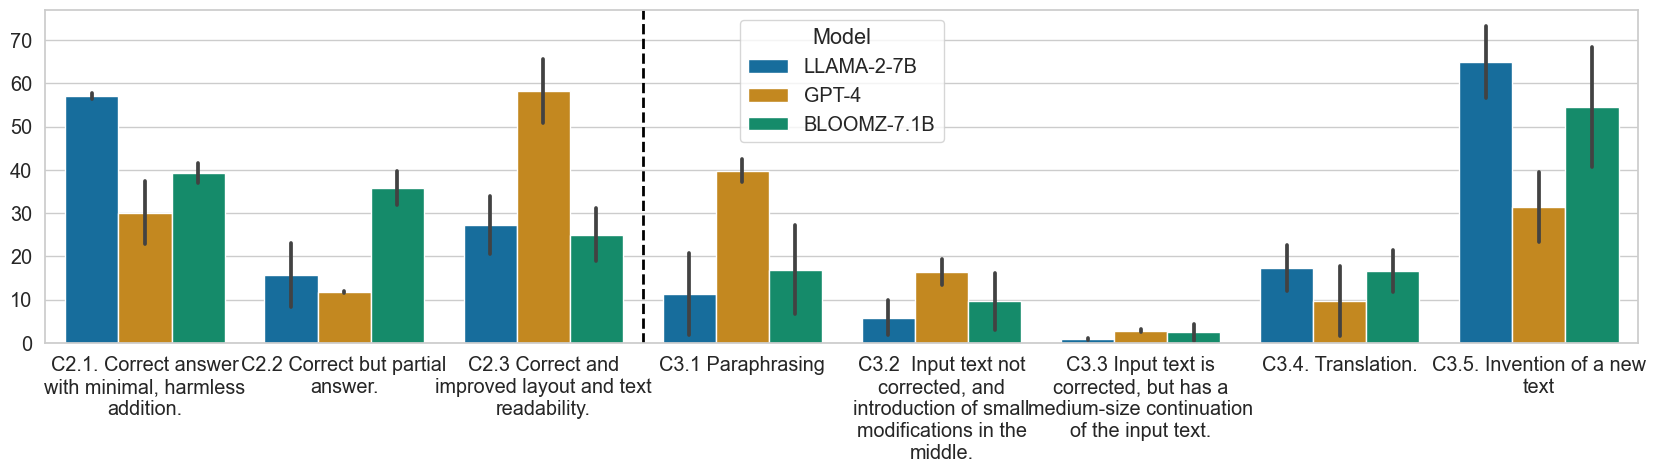

In [369]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap
sns.color_palette("colorblind", as_cmap=True)

sns.set_palette('colorblind')
sns.set_context("notebook", font_scale=1.3)
sns.set_style("whitegrid")

def wrap_text(text, width=24):
    """Wrap text for better display in plots."""
    return "\n".join(textwrap.wrap(text, width=width))

CASES = [case for case in list(data['Degradation Rate'].unique()) + list(data['Improvement Rate'].unique()) if len(case) > 2]
CASES = [wrap_text(case) for case in CASES]

# Combine 'Degradation Rate', 'Improvement Rate', and 'Response Rate' into a single column
improvement_data = data[['model', 'prompt', 'Improvement Rate']].rename(columns={'Improvement Rate': 'Rate'})
improvement_data['Rate Type'] = 'Improvement'
improvement_data = improvement_data[improvement_data['Rate'].str.len() > 2]
degradation_data = data[['model', 'prompt', 'Degradation Rate']].rename(columns={'Degradation Rate': 'Rate'})
degradation_data['Rate Type'] = 'Degradation'
degradation_data = degradation_data[degradation_data['Rate'].str.len() > 2]
combined_data = pd.concat([degradation_data, improvement_data])

# Calculate the percentage for each category
category_percentage = combined_data.groupby(['model', 'prompt', 'Rate Type', 'Rate']).size() / combined_data.groupby(['model', 'prompt', 'Rate Type']).size()
category_percentage = category_percentage.reset_index(name='percentage')

category_percentage = category_percentage.sort_values(by=['Rate Type'], ascending=[False])

# Sorting by 'Rate Type' and then by 'Rate'
category_percentage = category_percentage.sort_values(by=['Rate Type', 'Rate'])

# Wrapping text for axis labels
category_percentage['Rate'] = category_percentage['Rate'].apply(wrap_text)

unique_cases = [wrap_text(case) for case in list(category_percentage['Rate'].unique())]
untreated_cases = list(set(CASES) - set(unique_cases))

# Create a DataFrame with all possible combinations
all_combinations = pd.MultiIndex.from_product([data['model'].unique(), data['prompt'].unique(), 
                                               ['Improvement', 'Degradation'], untreated_cases], names=['model', 'prompt', 'Rate Type', 'Rate']).to_frame(index=False)
all_combinations['percentage'] = [0.0] * len(all_combinations)
category_percentage = pd.concat([category_percentage, all_combinations])

category_percentage['percentage'] = [x * 100.0 for x in category_percentage['percentage']]
category_percentage = category_percentage.sort_values(by=['Rate'], ascending=True)

# Plot
plt.figure(figsize=(17, 5))
barplot = sns.barplot(x='Rate', y='percentage', hue='model', data=category_percentage, )

# Finding positions to draw vertical lines
unique_rates_per_type = category_percentage.groupby('Rate Type')['Rate'].nunique().cumsum()
#     for pos in unique_rates_per_type[:-1]:  # Skip the last one as it's the end of the plot
for pos in [3]:  # Skip the last one as it's the end of the plot
    plt.axvline(pos - 0.5, color='black', linestyle='--', linewidth=2)

# plt.title(f'Combined Degradation and Improvement Rates, for All Datasets')
plt.ylabel('')
plt.xlabel('')
plt.legend(title='Model', loc='upper center')
plt.tight_layout()
plt.show()


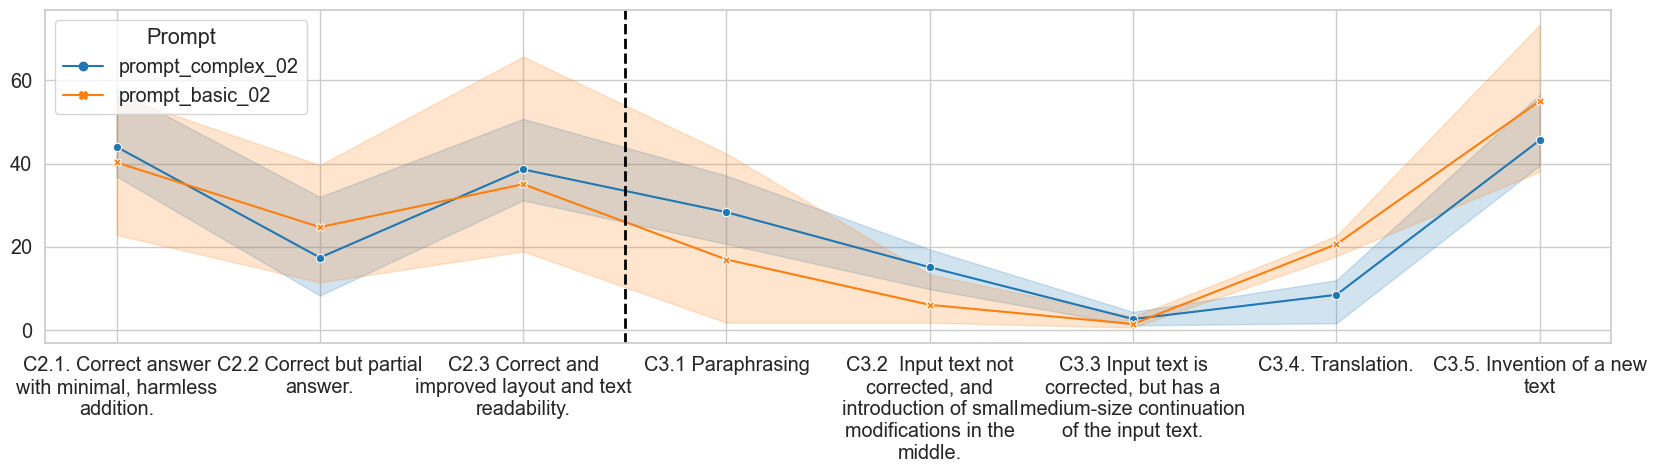

In [374]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap
sns.set_palette('colorblind')
sns.set_context("notebook", font_scale=1.3)
sns.set_style("whitegrid")

def wrap_text(text, width=24):
    """Wrap text for better display in plots."""
    return "\n".join(textwrap.wrap(text, width=width))

CASES = [case for case in list(data['Degradation Rate'].unique()) + list(data['Improvement Rate'].unique()) if len(case) > 2]
CASES = [wrap_text(case) for case in CASES]

# Prepare data for plotting
improvement_data = data[['model', 'prompt', 'Improvement Rate']].rename(columns={'Improvement Rate': 'Rate'})
improvement_data['Rate Type'] = 'Improvement'
improvement_data = improvement_data[improvement_data['Rate'].str.len() > 2]

degradation_data = data[['model', 'prompt', 'Degradation Rate']].rename(columns={'Degradation Rate': 'Rate'})
degradation_data['Rate Type'] = 'Degradation'
degradation_data = degradation_data[degradation_data['Rate'].str.len() > 2]

combined_data = pd.concat([degradation_data, improvement_data])
combined_data = combined_data.sort_values(by=['Rate'], ascending=[True])

# Calculate the percentage for each category
category_percentage = combined_data.groupby(['model', 'prompt', 'Rate Type', 'Rate']).size() / combined_data.groupby(['model', 'prompt', 'Rate Type']).size()
category_percentage = category_percentage.reset_index(name='percentage')
category_percentage = category_percentage.sort_values(by=['Rate'], ascending=True)

category_percentage['percentage'] = [x * 100.0 for x in category_percentage['percentage']]

# Wrapping text for axis labels
category_percentage['Rate'] = category_percentage['Rate'].apply(wrap_text)

# Plot
plt.figure(figsize=(17, 5))
sns.set_palette("tab10")
sns.lineplot(data=category_percentage, x='Rate', y='percentage', hue='prompt', style='prompt', markers=True, dashes=False)
for pos in [3]:  # Skip the last one as it's the end of the plot
    plt.axvline(pos - 0.5, color='black', linestyle='--', linewidth=2)
# plt.title('Degradation and Improvement Rates, for All Datasets')
plt.ylabel('')
plt.xlabel('')
# plt.xticks(rotation=90)
plt.legend(title='Prompt', loc='upper left') #bbox_to_anchor=(1.05, 1), 
plt.tight_layout()
plt.show()


In [ ]:
data['Improvement Rate'].unique()

In [ ]:
combined_data['Degradation Rate'].unique()

In [ ]:
combined_data = data

In [ ]:
combined_data.columns

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap

def wrap_text(text, width=15):
    """Wrap text for better display in plots."""
    return "\n".join(textwrap.wrap(text, width=width))

def plot_combined_rates(data, dataset_name, prompt):
    # Prepare data for plotting
    improvement_data = data[['model', 'prompt', 'Improvement Rate']].rename(columns={'Improvement Rate': 'Rate'})
    improvement_data = improvement_data[improvement_data['Rate'].str.len() > 2]
    improvement_data['Rate Type'] = 'Improvement'

    degradation_data = data[['model', 'prompt', 'Degradation Rate']].rename(columns={'Degradation Rate': 'Rate'})
    degradation_data = degradation_data[degradation_data['Rate'].str.len() > 2]
    degradation_data['Rate Type'] = 'Degradation'

    combined_data = pd.concat([improvement_data, degradation_data])
#     print(combined_data)
    # Filter data for the specific prompt
    prompt_data = combined_data[combined_data['prompt'] == prompt]
    # Calculate the percentage for each category
    category_percentage = prompt_data.groupby(['model', 'Rate Type', 'Rate']).size() / prompt_data.groupby(['model', 'Rate Type']).size()
    category_percentage = category_percentage.reset_index(name='percentage')

    # Sorting by 'Rate Type' and then by 'Rate'
    category_percentage = category_percentage.sort_values(by=['Rate Type', 'Rate'])
    
    # Wrapping text for axis labels
    category_percentage['Rate'] = category_percentage['Rate'].apply(wrap_text)

    # Plot
    plt.figure(figsize=(16, 6))
    sns.barplot(x='Rate', y='percentage', hue='model', data=category_percentage)

    # Drawing vertical lines to separate different rate types
    unique_rates = category_percentage['Rate'].unique()
    for i in range(len(unique_rates) - 1):
        plt.axvline(i + 0.5, color='grey', linestyle='--')

    plt.title(f'Combined Degradation and Improvement Rates for Prompt: {prompt} - {dataset_name}')
    plt.ylabel('Percentage')
    plt.xlabel('Rate')
    plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Iterate over each dataset and prompt
for dataset in data['dataset_name'].unique():
    dataset_data = data[data['dataset_name'] == dataset]
    for prompt in dataset_data['prompt'].unique():
        plot_combined_rates(dataset_data, dataset, prompt)
